# MUMBAI INFRASTRUCTURE

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import pandas as pd

In [196]:
url = 'https://www.nativeplanet.com/india-pin-codes/maharashtra/mumbai/'
html = requests.get(url).content
df = pd.read_html(html, attrs = {'class':'np-findersTable'})
df = pd.DataFrame(df[0])
df.columns = df.iloc[0]
df = df[1:]
df['City'] = 'Mumbai'
df.head(10)

,Post Office,Pincode,City
1,Antop Hill,400037,Mumbai
2,B P T Colony,400037,Mumbai
3,Haffkin Institute,400012,Mumbai
4,Mazgaon Dock,400010,Mumbai
5,Lal Baug,400012,Mumbai
6,Parel Rly Work Shop,400012,Mumbai
7,Princess Dock,400009,Mumbai
8,Reay Road,400033,Mumbai
9,Cotton Exchange,400033,Mumbai
10,Dadar Colony,400014,Mumbai


# Part2 : Latitude and Longitude

In [ ]:
!pip install geocoder

In [91]:
import geocoder

In [92]:
def get_lati_long(Pincode):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Mumbai, India'.format(Pincode))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_lati_long('400009')

[18.95742566200005, 72.83766500000007]

In [99]:
Pincode = df['Pincode']
coords = [get_lati_long(Pincode) for Pincode in Pincode.tolist()]

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=400026%2C+Mumbai%2C+India&maxLocations=1 (Caused by SSLError(SSLError("bad handshake: SysCallError(10054, 'WSAECONNRESET')")))
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceeded with url: /arcgis/rest/services/World/GeocodeServer/find?f=json&text=400026%2C+Mumbai%2C+India&maxLocations=1 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Max retries exceede

In [97]:
df_coords = pd.DataFrame(coords,columns = ['Latitude','Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

NameError: name 'coords' is not defined

In [100]:
mumbai = df

In [197]:
#mumbai.to_csv('mumbai.csv',index = False)
#df_csv= pd.read_csv(df)
mumbai = pd.read_csv('mumbai.csv')
mumbai.head()
df = mumbai[:238]
df.head(10)

,Post Office,Pincode,City,Latitude,Longitude
0,Antop Hill,400037,Mumbai,19.020313,72.868280
1,B P T Colony,400037,Mumbai,18.997550,72.840608
2,Haffkin Institute,400012,Mumbai,18.971480,72.843874
3,Mazgaon Dock,400010,Mumbai,18.997550,72.840608
4,Lal Baug,400012,Mumbai,18.997550,72.840608
5,Parel Rly Work Shop,400012,Mumbai,18.957426,72.837665
6,Princess Dock,400009,Mumbai,18.986693,72.844630
7,Reay Road,400033,Mumbai,18.986693,72.844630
8,Cotton Exchange,400033,Mumbai,19.015996,72.847255
9,Dadar Colony,400014,Mumbai,18.971480,72.843874


In [ ]:
!pip install geopy
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes

In [71]:
import folium
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
pd.pandas.set_option('display.max_columns', None)

In [84]:
address = 'Mumbai, Maharashtra, India'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Geographical coordinate of Mumbai, Maharashtra, India are latitude = {},longitude = {}.'.format(latitude,longitude))

Geographical coordinate of Mumbai, Maharashtra, India are latitude = 19.0759899,longitude = 72.8773928.


In [105]:
df = df.dropna()
map_mumbai = folium.Map(location = [latitude,longitude],zoom_start = 10)
#add Marker
for lat,lng,postoffice, city in zip(df['Latitude'], df['Longitude'], df['Post Office'], df['City']):
    label = '{},{}'.format(postoffice,city)
    label = folium.Popup(label,parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup = label,
    color = 'blue',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity = 0.7,
    parse_html = False).add_to(map_mumbai)
map_mumbai


## Define foursquare credentials and version

In [98]:
CLIENT_ID = '0W52JB2O22IVNNL5KAWAKA5AHVDQDTW5ZIUNLTZRPRD4I1OE'
CLIENT_SECRET = '5QS0R55MS1SZ503M5FWBWIF30XYABZAK2J0V0I1VQSOA1IZD' 
VERSION = '20180605'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0W52JB2O22IVNNL5KAWAKA5AHVDQDTW5ZIUNLTZRPRD4I1OE
CLIENT_SECRET:5QS0R55MS1SZ503M5FWBWIF30XYABZAK2J0V0I1VQSOA1IZD


### Exploring MUMBAI Neighbourhood 

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Post Office', 
                  'Post Office Latitude', 
                  'Post Office Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
mumbai_venues = getNearbyVenues(names = df['Post Office'], latitudes = df['Latitude'], longitudes = df['Longitude'])

Antop Hill
B P T Colony
Haffkin Institute
Mazgaon Dock
Lal Baug
Parel Rly Work Shop
Princess Dock
Reay Road
Cotton Exchange
Dadar Colony
V K Bhavan
Wadala Rs
Wadala Truck Terminal
BEST STaff Quarters
Dadar H.O
Kalachowki
Noor Baug
Sewri
V J B Udyan
B.P.Lane
Chinchbunder H.O
Masjid
Mazgaon Road
Parel
Tank Road
L B S N E collage
Mazgaon
Chamarbaug
Kidwai Nagar (Mumbai)
Naigaon (Mumbai)
Null Bazar
Parel Naka
Wadala
C G S Colony
Dockyard Road
Mandvi (Mumbai)
Andheri H.O
Andheri Railway Station
H.M.P. School
Nagardas Road
Airport (Mumbai)
B.N. Bhavan
J.B. Nagar
Vesava
Vileeparle (East)
Vileparle Railway Station
Audit Bhavan
International Airport
Khar Delivery
Marol Naka
Vakola
Kherwadi
Andheri East
Bandra West
Chakala Midc
Sahar P & T Colony
Sahargaon
V.P. Road
A I Staff Colony
Vidyanagari
Vileparle(West)
Bandra(East)
IRLA
Marol Bazar
Santacruz P&t Colony
Santacruz(West)
Seepz
Azad Nagar (Mumbai)
Danda
Government Colony
Hanuman Road
Juhu
Khar Colony
Madh
Santacruz Central
Santacruz(East)
Be

KeyError: 'groups'

In [ ]:
mumbai_venues.to_csv('mumbai_venues.csv',index = False)
mumbai_venues.head()

In [198]:
mumbai_venues = pd.read_csv('mumbai_venues,.csv')
mumbai_venues.head(10)

,Post Office,Post Office Latitude,Post Office Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Antop Hill,19.020313,72.868280,Malvani Days,19.018984,72.865363,Diner
1,Antop Hill,19.020313,72.868280,Monginis Cake Shop,19.022737,72.865670,Convenience Store
2,Antop Hill,19.020313,72.868280,Wadala Skywalk,19.018421,72.864422,Trail
3,B P T Colony,18.997550,72.840608,ITC Grand Central,18.998469,72.838433,Hotel
4,B P T Colony,18.997550,72.840608,Kebabs & Kurries,18.997938,72.837639,Indian Restaurant
5,B P T Colony,18.997550,72.840608,Terrace Garden,18.998119,72.838529,Roof Deck
6,B P T Colony,18.997550,72.840608,Hornby's Pavilion,18.998141,72.838419,Restaurant
7,B P T Colony,18.997550,72.840608,The Point Of View,18.998211,72.838543,Lounge
8,B P T Colony,18.997550,72.840608,7 Spice - Chinese Restaurant,18.995603,72.839060,Chinese Restaurant
9,B P T Colony,18.997550,72.840608,Dublin,18.997737,72.837737,Bar


In [58]:
print('{} venues were returned by Foursquare.'.format(mumbai_venues.shape[0]))

2879 venues were returned by Foursquare.


In [59]:
mumbai_venues_grouped = mumbai_venues.groupby('Post Office').count().reset_index()
mumbai_venues_grouped.head()

,Post Office,Post Office Latitude,Post Office Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A I Staff Colony,8,8,8,8,8,8
1,Aareymilk Colony,5,5,5,5,5,5
2,Agripada,4,4,4,4,4,4
3,Airport (Mumbai),7,7,7,7,7,7
4,Ambewadi (Mumbai),16,16,16,16,16,16


In [60]:
print('There are {} uniques categories'.format(len(mumbai_venues['Venue Category'].unique())))

There are 171 uniques categories


#### Analyse Each Neighbourhood

In [199]:
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix = "", prefix_sep ="")
mumbai_onehot['Post Office'] = mumbai_venues['Post Office']
fixed_columns = [mumbai_onehot.columns[-1]]+list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]
mumbai_onehot.head(10)

,Post Office,ATM,Airport,Airport Lounge,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Convenience Store,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Light Rail Station,Lighthouse,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Recreation Center,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Spanish Restaurant,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Track,Trail,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio,Zoo
0,Antop Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Antop Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Antop Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,B P T Colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,B P T Colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

In [62]:
mumbai_grouped = mumbai_onehot.groupby('Post Office').mean().reset_index()

In [200]:
mumbai_grouped.shape
mumbai_grouped.head(10)

,Post Office,ATM,Airport,Airport Lounge,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Station,Café,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Cafeteria,College Gym,Comedy Club,Comfort Food Restaurant,Convenience Store,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,History Museum,Hockey Arena,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Light Rail Station,Lighthouse,Lounge,Luggage Store,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mountain,Movie Theater,Moving Target,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,Nightclub,North Indian Restaurant,Office,Other Great Outdoors,Outdoors & Recreation,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Recreation Center,Restaurant,Roof Deck,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Spanish Restaurant,Sports Bar,Stadium,Steakhouse,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Track,Trail,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Women's Store,Yoga Studio,Zoo
0,A I Staff Colony,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.125,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.125000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.250000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.125,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0,0.000000,0.000,0.0,0.125000,0.0,0.0,0.000000,0.0,0.0
1,Aareymilk Colony,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.0,0.2,0.0,0.0,0.0,0.

#### Top 5 Venues

In [16]:
num_top_venues = 5
for hood in mumbai_grouped['Post Office']:
    print("----"+hood+"----")
    temp = mumbai_grouped[mumbai_grouped['Post Office'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq':2})
    print(temp.sort_values('freq',ascending = False).reset_index(drop=True).head(num_top_venues))
    
    print('\n')


----A I Staff Colony----
                           venue  freq
0              Indian Restaurant  0.25
1                      Pet Store  0.12
2                            Bar  0.12
3                    Bus Station  0.12
4  Vegetarian / Vegan Restaurant  0.12


----Aareymilk Colony----
                  venue  freq
0            Restaurant   0.2
1           Pizza Place   0.2
2     Indian Restaurant   0.2
3          Neighborhood   0.2
4  Fast Food Restaurant   0.2


----Agripada----
                  venue  freq
0          Dance Studio  0.25
1  Fast Food Restaurant  0.25
2                 Hotel  0.25
3            Shoe Store  0.25
4   Monument / Landmark  0.00


----Airport (Mumbai)----
                  venue  freq
0                   Gym  0.14
1  Fast Food Restaurant  0.14
2     Indian Restaurant  0.14
3   Indie Movie Theater  0.14
4                   Spa  0.14


----Ambewadi (Mumbai)----
                venue  freq
0  Italian Restaurant  0.12
1   Indian Restaurant  0.12
2               

In [78]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    return row_categories_sorted.index.values[0:num_top_venues]
mumbai_grouped.iloc[0,:]

Post Office                      A I Staff Colony
ATM                                             0
Airport                                         0
Airport Lounge                                  0
American Restaurant                             0
Arcade                                          0
Art Gallery                                     0
Arts & Crafts Store                             0
Asian Restaurant                                0
Athletics & Sports                              0
Auto Workshop                                   0
BBQ Joint                                       0
Bagel Shop                                      0
Bakery                                          0
Bank                                            0
Bar                                         0.125
Beach                                           0
Bed & Breakfast                                 0
Beer Garden                                     0
Bengali Restaurant                              0


In [213]:
num_top_venues = 10
indicators = ['st' , 'nd' , 'rd']
columns = ['Post Office']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1,indicators[ind]))
    except:
        columns.append('{}th most common venue'.format(ind+1))

neighbourhood_venues_sorted = pd.DataFrame(columns = columns)
neighbourhood_venues_sorted['Post Office'] = mumbai_grouped['Post Office']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighbourhood_venues_sorted.iloc[ind,1:] = return_most_common_venues(mumbai_grouped.iloc[ind,:], num_top_venues)
neighbourhood_venues_sorted.to_csv('neighbourhood_venues_sorted.csv',index = False)
neighbourhood_venues_sorted.head()

,Post Office,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,A I Staff Colony,Indian Restaurant,Pet Store,Bus Station,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Bar,Juice Bar,Falafel Restaurant,Food,Flower Shop
1,Aareymilk Colony,Pizza Place,Indian Restaurant,Fast Food Restaurant,Neighborhood,Restaurant,Zoo,Electronics Store,Flower Shop,Flea Market,Field
2,Agripada,Hotel,Dance Studio,Shoe Store,Fast Food Restaurant,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market,Field
3,Airport (Mumbai),Spa,Indian Restaurant,Café,Indie Movie Theater,Gym,Italian Restaurant,Fast Food Restaurant,Zoo,Falafel Restaurant,Food
4,Ambewadi (Mumbai),Italian Restaurant,Indian Restaurant,Snack Place,Food Truck,Coffee Shop,Hotel,Gym,Ice Cream Shop,Shopping Mall,Spa


In [23]:
# Quality Infrastructure 
search_query= ['Restaurant', 'Hotel', 'Farmers Market', 'Shopping Mall', 'Gym / Fitness Center', 'Pharmacy',
                         'Electronics Store', 'Indie Movie Theater', 'Light Rail Station','Metro Station', 'Train','Train Station', 'Garden',
                          'Theater','ATM', 'Office', 'Bus Station', 'Bank', 'Market' , 'Business Service', 'Monument / Landmark' ,
                          'Resort', 'Hospital', 'Police Station', 'School', 'College', 'Café' , 'Park', 'Playground',
                'Convention Center', 'College Auditorium', 'Government Building', 'Airport Terminal',
                         ]
print(len(search_query))

33


In [24]:
quality_dataframe = []
quality_dataframe= mumbai_venues.loc[mumbai_venues['Venue Category'].isin(search_query)]
quality_dataframe.head()

,Post Office,Post Office Latitude,Post Office Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,B P T Colony,18.99755,72.840608,ITC Grand Central,18.998469,72.838433,Hotel
6,B P T Colony,18.99755,72.840608,Hornby's Pavilion,18.998141,72.838419,Restaurant
11,B P T Colony,18.99755,72.840608,Leo Burnett India,18.998824,72.840360,Office
14,B P T Colony,18.99755,72.840608,HDFC Bank,18.998650,72.839495,Bank
21,Haffkin Institute,18.97148,72.843874,Cafe Coffee Day,18.968807,72.840652,Café


In [25]:
qualitymumbai_onehot = pd.get_dummies(quality_dataframe[['Venue Category']], prefix="", prefix_sep="")
# add postal, borough and neighborhood column back to dataframe
qualitymumbai_onehot['Post Office'] = quality_dataframe['Post Office'] 
cols = list(qualitymumbai_onehot.columns)
cols = list([cols[-1]])+list(cols[:-1])
qualitymumbai_onehot = qualitymumbai_onehot[cols]
qualitymumbai_onehot.head()

,Post Office,ATM,Bank,Bus Station,Café,College Auditorium,Electronics Store,Farmers Market,Garden,Gym / Fitness Center,Hotel,Indie Movie Theater,Light Rail Station,Market,Monument / Landmark,Office,Park,Pharmacy,Playground,Restaurant,Shopping Mall,Theater,Train Station
3,B P T Colony,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,B P T Colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,B P T Colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
14,B P T Colony,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,Haffkin Institute,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [149]:
qualitymumbai_onehot_grouped = qualitymumbai_onehot.groupby('Post Office').sum().reset_index()

In [150]:
qualitymumbai_onehot_grouped.head()

,Post Office,ATM,Bank,Bus Station,Café,College Auditorium,Electronics Store,Farmers Market,Garden,Gym / Fitness Center,Hotel,Indie Movie Theater,Light Rail Station,Market,Monument / Landmark,Office,Park,Pharmacy,Playground,Restaurant,Shopping Mall,Theater,Train Station
0,A I Staff Colony,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aareymilk Colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Agripada,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Airport (Mumbai),0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Ambewadi (Mumbai),0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [151]:
qualitymumbai_onehot_grouped['Total Infrastructure'] = qualitymumbai_onehot_grouped[qualitymumbai_onehot_grouped.drop(['Post Office'],axis = 1).columns.values].sum(axis =1)
qualitymumbai_onehot_grouped.sort_values(by = ['Total Infrastructure'] ,ascending = False).head()

,Post Office,ATM,Bank,Bus Station,Café,College Auditorium,Electronics Store,Farmers Market,Garden,Gym / Fitness Center,Hotel,Indie Movie Theater,Light Rail Station,Market,Monument / Landmark,Office,Park,Pharmacy,Playground,Restaurant,Shopping Mall,Theater,Train Station,Total Infrastructure
145,Stock Exchange,0,1,0,7,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,0,0,13
55,High Court Building (Mumbai),0,1,0,7,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,0,0,13
114,Opera House,0,1,0,7,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,0,0,13
106,Nariman Point,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,1,3,0,10
65,Kalbadevi H.O,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,1,3,0,10


In [148]:
qualitymumbai_onehot_grouped = qualitymumbai_onehot_grouped.set_index('Post Office')

KeyError: 'Post Office'

## Best Infrastructure Area in MUMBAI

In [38]:
qualitymumbai_onehot_grouped[qualitymumbai_onehot_grouped['Total Infrastructure'] == qualitymumbai_onehot_grouped['Total Infrastructure'].max()].transpose()

Post Office,High Court Building (Mumbai),Opera House,Stock Exchange
ATM,0,0,0
Bank,1,1,1
Bus Station,0,0,0
Café,7,7,7
College Auditorium,0,0,0
Electronics Store,0,0,0
Farmers Market,0,0,0
Garden,0,0,0
Gym / Fitness Center,1,1,1
Hotel,2,2,2


## Least Infrastructure Area in Mumbai

In [226]:
badquality = qualitymumbai_onehot_grouped[qualitymumbai_onehot_grouped['Total Infrastructure'] == qualitymumbai_onehot_grouped['Total Infrastructure'].min()]
colm = list(badquality.columns)
colm = [colm[0]]+[colm[-1]]+colm[1:-1]
badquality[colm].shape

(35, 24)

# CLUSTURING NEIGHBOURHOOD

### Selecting No.s of Clusture

In [214]:
def plot(x, y):
    fig = plt.figure(figsize=(12,6))
    plt.plot(x, y, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Scores')
    plt.title('Checking Optimum Number of Clusters')
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [215]:
maxk = 15
scores = []
kval = []
from sklearn.metrics import silhouette_score
for k in range(2, maxk+1):
    cl_df = mumbai_grouped.drop('Post Office', axis=1)
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=40).fit_predict(cl_df) #Choose any random_state
    
    score = silhouette_score(cl_df, kmeans, metric='euclidean', random_state=0)
    kval.append(k)
    scores.append(score)

0.05725073122437383
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


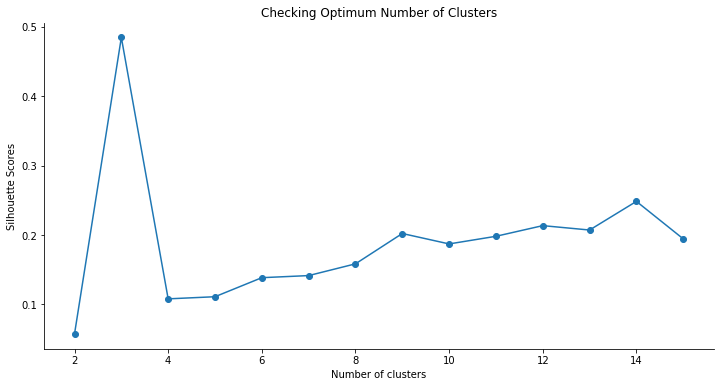

In [216]:
print(np.min(scores))
print(kval)
plot(kval, scores)

#### 3 gives maximum SILHOUETTE SCORES 

In [217]:
kclusters = 3
mumbai_grouped_clustering = mumbai_grouped.drop('Post Office',1)
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', max_iter = 200, random_state = 40, n_init = 100).fit(mumbai_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 2, 2, 2, 2, 2, 2, 2, 2])

### Creating New Dataframe  that Include the Cluster as well as the Top 10 Neighborhood


In [218]:
neighbourhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
mumbai_merged1 = df
mumbai_merged1 = mumbai_merged1.join(neighbourhood_venues_sorted.set_index('Post Office'), on = 'Post Office')
mumbai_merged1.head(10)

,Post Office,Pincode,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,Antop Hill,400037,Mumbai,19.020313,72.868280,2.0,Convenience Store,Diner,Trail,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field
1,B P T Colony,400037,Mumbai,18.997550,72.840608,0.0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
2,Haffkin Institute,400012,Mumbai,18.971480,72.843874,0.0,Ice Cream Shop,Indian Restaurant,Dessert Shop,Flea Market,Café,Chinese Restaurant,Zoo,Farmers Market,Food & Drink Shop,Food
3,Mazgaon Dock,400010,Mumbai,18.997550,72.840608,0.0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
4,Lal Baug,400012,Mumbai,18.997550,72.840608,0.0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
5,Parel Rly Work Shop,400012,Mumbai,18.957426,72.837665,0.0,Indian Restaurant,Hotel,Furniture / Home Store,Convenience Store,Chinese Restaurant,Café,Sandwich Place,Flea Market,Smoke Shop,Harbor / Marina
6,Princess Dock,400009,Mumbai,18.986693,72.844630,2.0,Whisky Bar,Train Station,Plaza,Bakery,Zoo,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market
7,Reay Road,400033,Mumbai,18.986693,72.844630,2.0,Whisky Bar,Train Station,Plaza,Bakery,Zoo,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market
8,Cotton Exchange,400033,Mumbai,19.015996,72.847255,0.0,Indian Restaurant,Coffee Shop,Café,Hotel,Vegetarian / Vegan Restaurant,Lounge,Restaurant,Juice Bar,Bakery,Farmers Market
9,Dadar Colony,400014,Mumbai,18.971480,72.843874,0.0,Ice Cream Shop,Indian Restaurant,Dessert Shop,Flea Market,Café,Chinese Restaurant,Zoo,Farmers Market,Food & Drink Shop,Food


In [206]:
mumbai_merged1 = mumbai_merged1.dropna(subset = ['Cluster Labels'])
mumbai_merged1['Cluster Labels'] = mumbai_merged1['Cluster Labels'].astype(int)
mumbai_merged1.head()

,Post Office,Pincode,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,Antop Hill,400037,Mumbai,19.020313,72.868280,2,Convenience Store,Diner,Trail,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field
1,B P T Colony,400037,Mumbai,18.997550,72.840608,0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
2,Haffkin Institute,400012,Mumbai,18.971480,72.843874,0,Ice Cream Shop,Indian Restaurant,Dessert Shop,Flea Market,Café,Chinese Restaurant,Zoo,Farmers Market,Food & Drink Shop,Food
3,Mazgaon Dock,400010,Mumbai,18.997550,72.840608,0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
4,Lal Baug,400012,Mumbai,18.997550,72.840608,0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop


In [207]:
map_clusters = folium.Map(location = [latitude, longitude], zoom_start = 11)
x = np.arange(kclusters)
ys = [i + x + (1*x)**2 for i in range(kclusters)]
colors_array = [    'red',    'blue',    'green']
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster,venue in zip(mumbai_merged1['Latitude'], mumbai_merged1['Longitude'], mumbai_merged1['Post Office'], mumbai_merged1['Cluster Labels'],mumbai_merged1['1st Most Common Venue']):
    if len(qualitymumbai_onehot_grouped['Total Infrastructure'].loc[qualitymumbai_onehot_grouped['Post Office'] == poi]) == 0:
        total_infra = 0
    else:
        total_infra = qualitymumbai_onehot_grouped['Total Infrastructure'].loc[qualitymumbai_onehot_grouped['Post Office'] == poi].iloc[0]
    label = folium.Popup(str(poi) + ' Most visited:'+ str(venue) + ' Cluster ' + str(cluster)+ '  Total Infrastructure:' + str(total_infra), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)

map_clusters

### CLUSTER 1

In [227]:
mumbai_merged1.loc[mumbai_merged1['Cluster Labels'] == 0, mumbai_merged1.columns[[0]+[1]+list(range(5,mumbai_merged1.shape[1]))]]

,Post Office,Pincode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
1,B P T Colony,400037,0.0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
2,Haffkin Institute,400012,0.0,Ice Cream Shop,Indian Restaurant,Dessert Shop,Flea Market,Café,Chinese Restaurant,Zoo,Farmers Market,Food & Drink Shop,Food
3,Mazgaon Dock,400010,0.0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
4,Lal Baug,400012,0.0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
5,Parel Rly Work Shop,400012,0.0,Indian Restaurant,Hotel,Furniture / Home Store,Convenience Store,Chinese Restaurant,Café,Sandwich Place,Flea Market,Smoke Shop,Harbor / Marina
8,Cotton Exchange,400033,0.0,Indian Restaurant,Coffee Shop,Café,Hotel,Vegetarian / Vegan Restaurant,Lounge,Restaurant,Juice Bar,Bakery,Farmers Market
9,Dadar Colony,400014,0.0,Ice Cream Shop,Indian Restaurant,Dessert Shop,Flea Market,Café,Chinese Restaurant,Zoo,Farmers Market,Food & Drink Shop,Food
12,Wadala Truck Terminal,400037,0.0,Indian Restaurant,Office,Bar,Shoe Store,Roof Deck,Luggage Store,Lounge,Restaurant,Chinese Restaurant,Coffee Shop
13,BEST STaff Quarters,400012,0.0,Indian Restaurant,Coffee Shop,Café,Hotel,Vegetarian / Vegan Restaurant,Lounge,Restaurant,Juice Bar,Bakery,Farmers Market
15,Kalachowki,400033,0.0,Indian Restaurant,Hotel,Furniture / Home Store,Convenience Store,Chinese Restaurant,Café,Sandwich Place,Flea Market,Smoke Shop,Harbor / Marina


In [228]:
mumbai_merged1.loc[mumbai_merged1['Cluster Labels'] == 1, mumbai_merged1.columns[[0]+[1]+list(range(5,mumbai_merged1.shape[1]))]]

,Post Office,Pincode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
16,Noor Baug,400009,1.0,ATM,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market
115,Trombay,400088,1.0,ATM,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market
135,Oshiwara,400102,1.0,ATM,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market
151,Dahisar,400068,1.0,ATM,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field,Fast Food Restaurant,Farmers Market


In [230]:
mumbai_merged1.loc[mumbai_merged1['Cluster Labels'] == 2, mumbai_merged1.columns[[0]+[1]+list(range(5,mumbai_merged1.shape[1]))]]

,Post Office,Pincode,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,Antop Hill,400037,2.0,Convenience Store,Diner,Trail,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field
6,Princess Dock,400009,2.0,Whisky Bar,Train Station,Plaza,Bakery,Zoo,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market
7,Reay Road,400033,2.0,Whisky Bar,Train Station,Plaza,Bakery,Zoo,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market
10,V K Bhavan,400010,2.0,Gym,Smoke Shop,Cupcake Shop,Pizza Place,Café,Movie Theater,Falafel Restaurant,Food,Flower Shop,Flea Market
11,Wadala Rs,400031,2.0,Convenience Store,Diner,Trail,Falafel Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Field
14,Dadar H.O,400014,2.0,Whisky Bar,Train Station,Plaza,Bakery,Zoo,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market
23,Parel,400012,2.0,Whisky Bar,Train Station,Plaza,Bakery,Zoo,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market
24,Tank Road,400033,2.0,Whisky Bar,Train Station,Plaza,Bakery,Zoo,Falafel Restaurant,Food & Drink Shop,Food,Flower Shop,Flea Market
27,Chamarbaug,400012,2.0,Gym,Smoke Shop,Cupcake Shop,Pizza Place,Café,Movie Theater,Falafel Restaurant,Food,Flower Shop,Flea Market
31,Parel Naka,400012,2.0,Gym,Smoke Shop,Cupcake Shop,Pizza Place,Café,Movie Theater,Falafel Restaurant,Food,Flower Shop,Flea Market


## Results and Discussion

Mumbai has a very good rail connectivity with diffrent parts of the city therefore transportation is not a problem, therefore area near to your job location can be choosen. What mumbai has a problem of highly expensive houses, so best area can be selected with affordable house price near to the job location along with the facilities like schools, malls, bank, hospital and other basic need requirements.

The basic infrastructure were selcted from diffrent venue's. This infrastructure are located in diffrent areas in mumbai. Finally, the area with the best infrastructure is selected. Along with this the area with least infrastructure were located. High Court Building, Opera House and Stock exchange were some areas of best infrastructure in Mumbai. There are 35 areas with least infrastructure from that list.

Clusters were selected with the help of silhoette score. from 2 to 15 no.s of clusters silhouette score is plotted. 3 Cluster are used as it gives maximum value of silhouette score. 
Cluster 0 looks like area with multiple office along with other basic needs facility as well as restaurants and other facilities for enjoyment as along with profesional life there need some good social life. So this cluster look good for the people coming to this city and and having work location within this cluster.
Cluster 1 is a very small cluster of 4 diffrent areas which include food courts and some farmers market. So this cluster doesn't look great to stay in mumbai from the basic infrastructure point of view.
Cluster 2 is a very big cluster include restaurants , spa, gym, bar , louge and Hotel. This cluster looks good for new people comming to this city. This cluster also includes hotels, louge therefore also can be the good area for the tourist in the city, as this area includes airport along with other enjoyment places.

## Conclusion

I have succesfully analysed the neighborhoods in mumbai, India for determining the location for the new people comming to the city. The people coming to the cities can look fro the area with good infrstructure like hospitals, schools, gym, malls and proper connectivity with diffrent parts of the city.  High Court Building, Opera House and Stock exchange were some areas of best infrastructure in Mumbai.

People can further select the best place according to there job location in the city and there capability of taking the expenses of that area in the city.